In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('results copy.csv')
df

,eps_start,eps_end,mean_reward,std_reward,seed
0,1.0,0.30,98.73,4.213917,670487.0
1,1.0,0.10,180.29,20.951513,670487.0
2,1.0,0.20,99.90,3.780212,670487.0
3,1.0,0.05,101.25,3.884263,670487.0
4,1.0,0.01,106.11,58.486904,670487.0
5,0.9,0.01,176.54,5.662897,670487.0
6,0.9,0.20,96.90,8.676981,670487.0
7,0.9,0.10,71.64,20.901923,670487.0
8,0.9,0.05,148.93,3.834723,670487.0
9,0.9,0.30,12.66,1.069766,670487.0


In [5]:
df['seed'] = df['seed'].astype(int)
df['mean_reward'] = df['mean_reward'].astype(float).round(2)
df['std_reward'] = df['std_reward'].astype(float).round(2)
df

,eps_start,eps_end,mean_reward,std_reward,seed
0,1.0,0.30,98.73,4.21,670487
1,1.0,0.10,180.29,20.95,670487
2,1.0,0.20,99.90,3.78,670487
3,1.0,0.05,101.25,3.88,670487
4,1.0,0.01,106.11,58.49,670487
5,0.9,0.01,176.54,5.66,670487
6,0.9,0.20,96.90,8.68,670487
7,0.9,0.10,71.64,20.90,670487
8,0.9,0.05,148.93,3.83,670487
9,0.9,0.30,12.66,1.07,670487


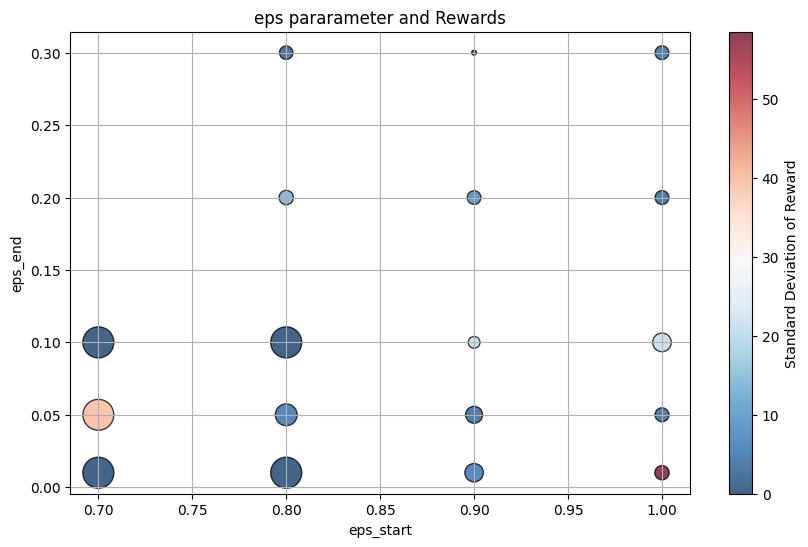

In [13]:
# Normalize sizes for better visualization
size_scale = 500 / df['mean_reward'].max()  # Scale for plotting

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['eps_start'],
    df['eps_end'],
    s=df['mean_reward'] * size_scale,  # Circle size
    c=df['std_reward'],                # Color by std_reward
    cmap='RdBu_r',
    alpha=0.75,
    edgecolors='k'
)

plt.xlabel("eps_start")
plt.ylabel("eps_end")
plt.title("eps pararameter and Rewards")
cbar = plt.colorbar(scatter)
cbar.set_label("Standard Deviation of Reward")

plt.grid(True)
plt.show()